## Problem Description:
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset.Virginica

In iris dataset there are 150 samples containing following features:

Sepal Length

Sepal Width

Petal length

Petal width

Using above 4 features classify a flower  in one of the three categories:

Setosa

Versicolour

Virginica

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [2]:
#loading the iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
 #features
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

#Add the target variable 'species' to the DataFrame
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data exploration and preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.shape

(150, 5)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
#Dropping dulpivates
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
df = df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
df['class'].unique()

array([0, 1, 2])

In [18]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

## Visualization

In [21]:
#Relationships between different pairs of variables (features) in the Iris dataset.

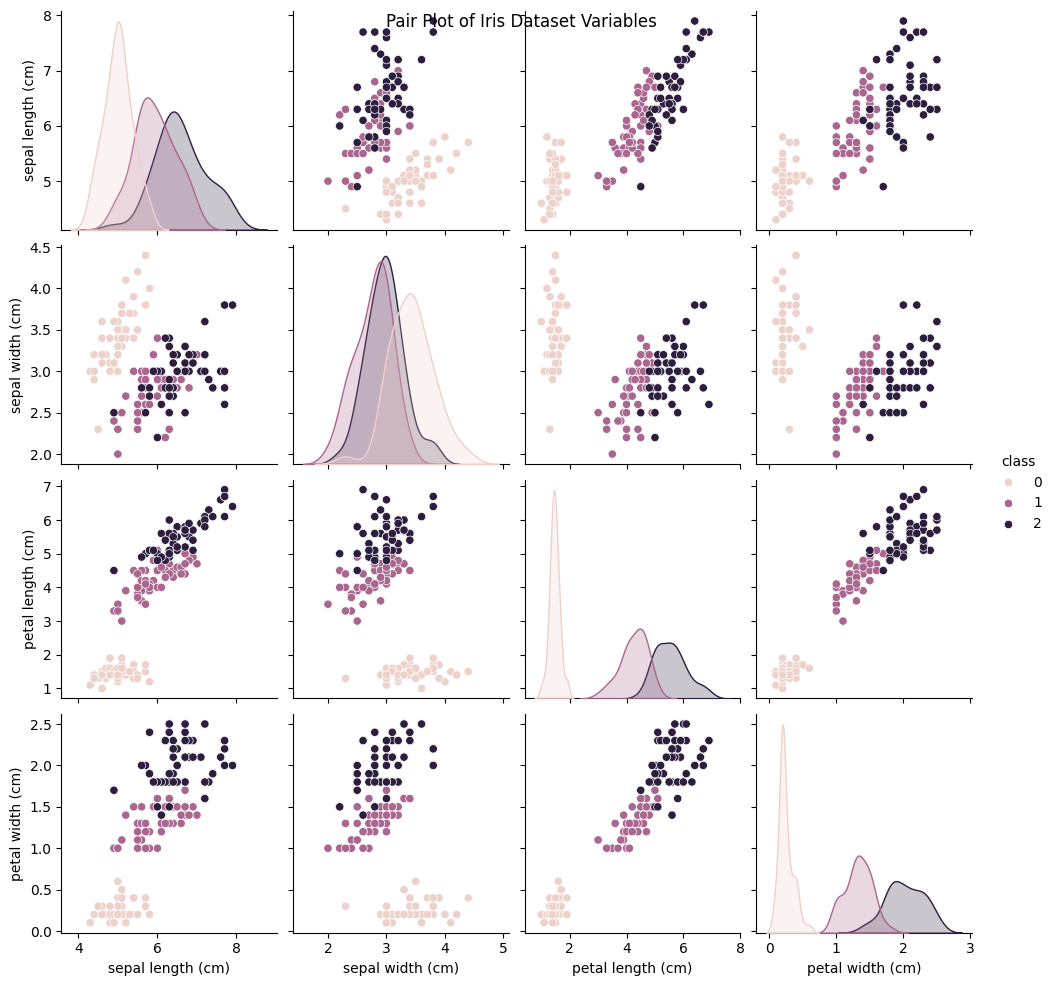

In [19]:
sns.pairplot(df,hue  = 'class')
plt.suptitle('Pair Plot of Iris Dataset Variables')
plt.show()

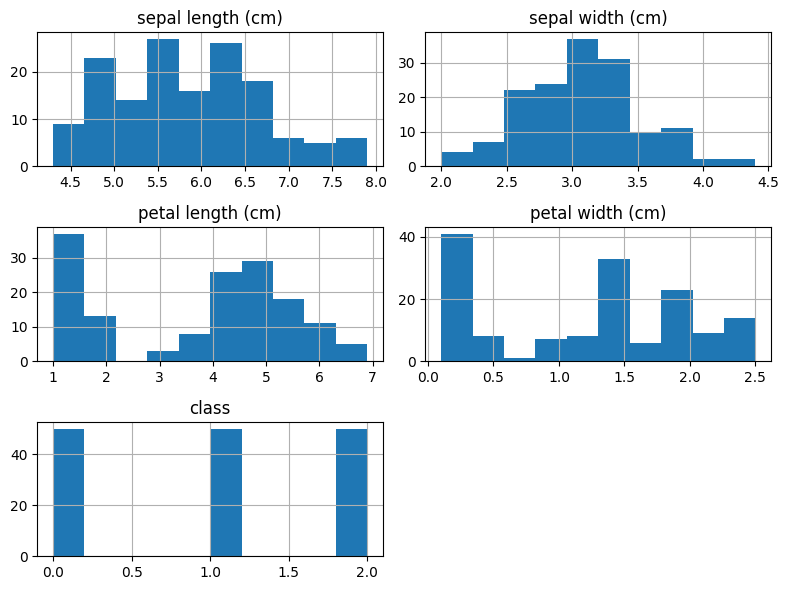

In [20]:
#Plotting histogram for each feature
df.hist(figsize =(8,6))
plt.tight_layout() 
plt.show()

In [22]:
colname = df.select_dtypes('float64').columns
colname

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

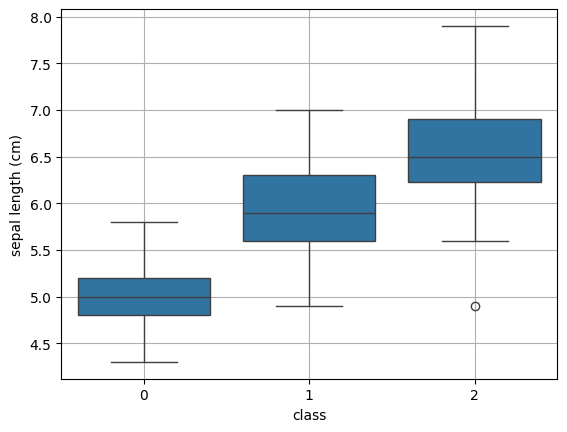

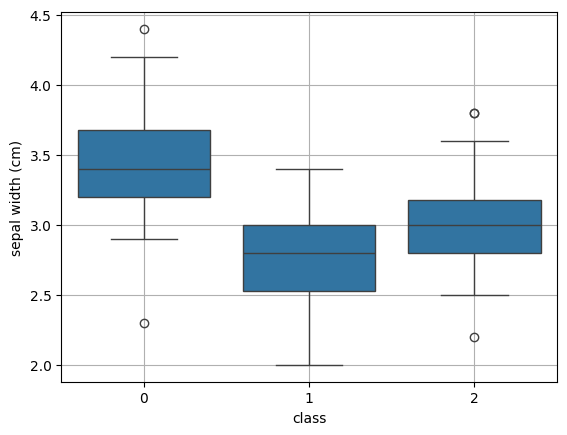

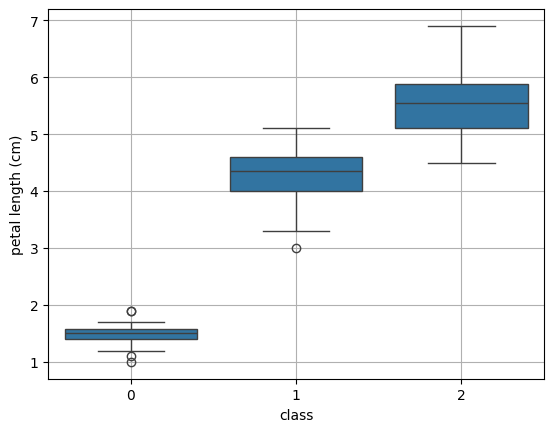

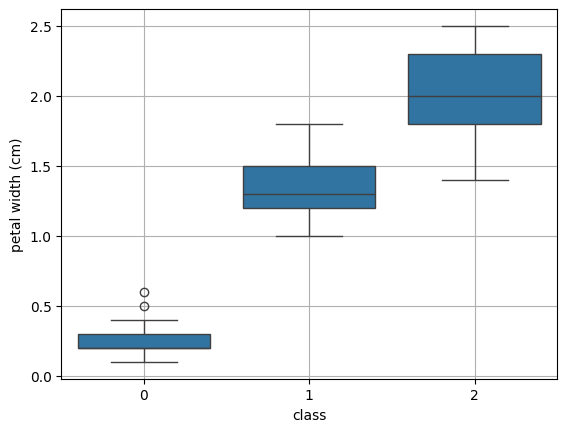

In [23]:
for col in df[colname]:
    plt.figure()
    sns.boxplot(data=df,x='class',y=df[col])
    plt.grid()
    plt.show()

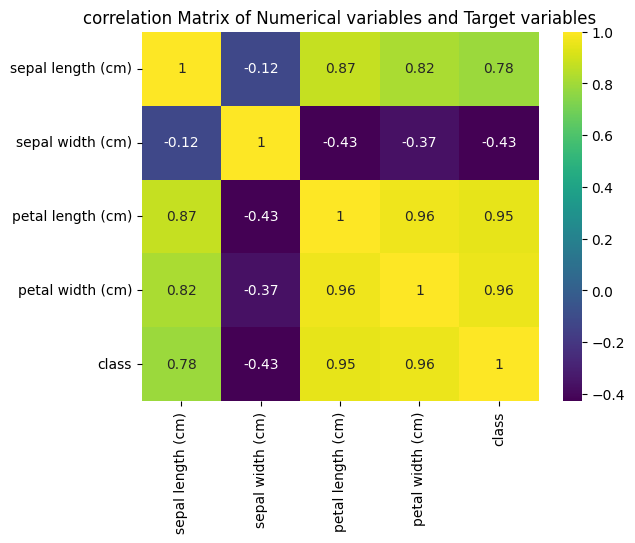

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='viridis')
plt.title('correlation Matrix of Numerical variables and Target variables')
plt.show()

#OUTLIER REMOVAL

In [25]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [26]:
#Removing outliers using capping
for i in df.select_dtypes(include='number').columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

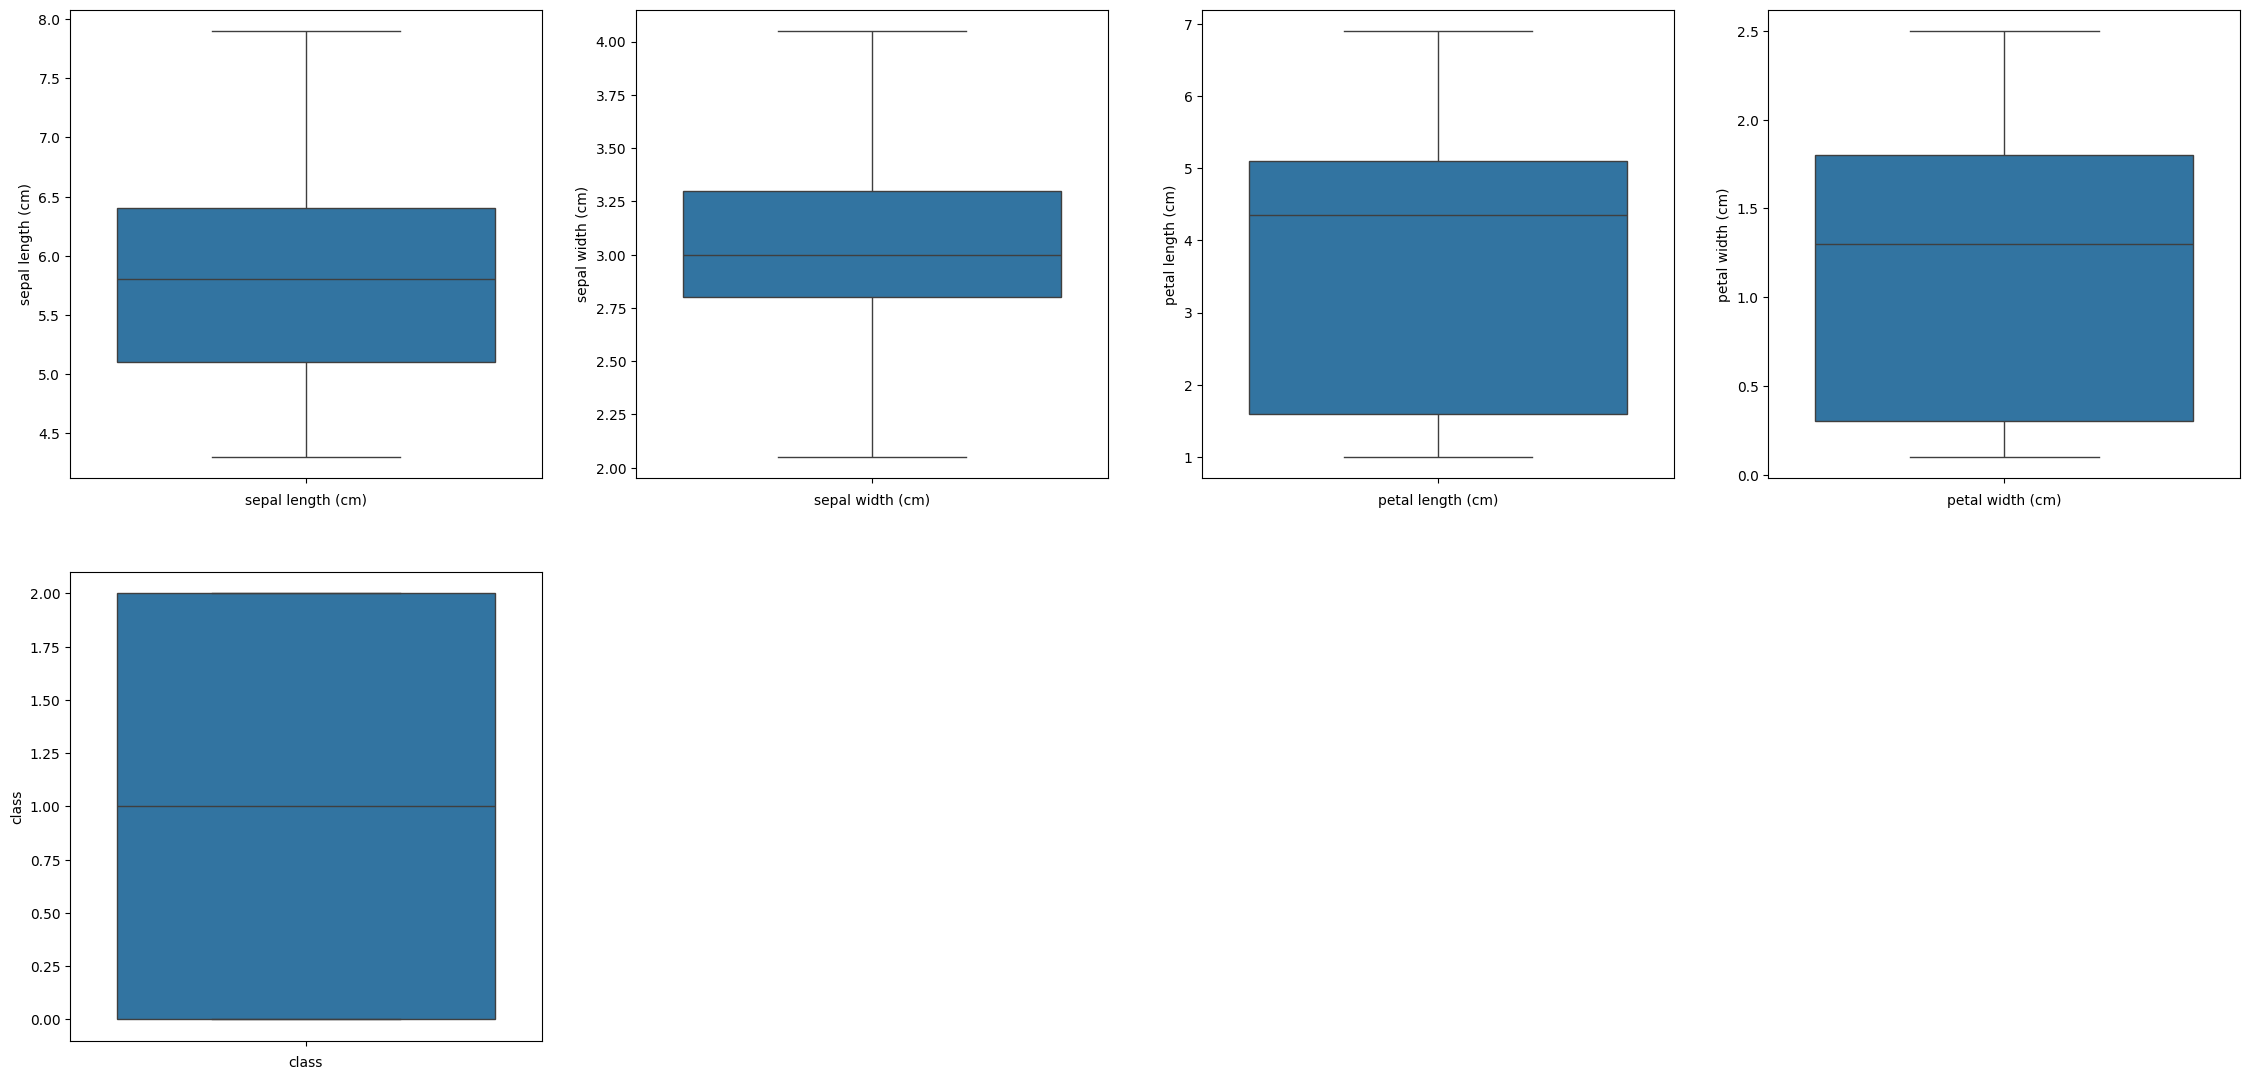

In [29]:
fig = plt.figure(figsize=(28,28))
counter = 0

for col in df.select_dtypes(include = 'number').columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1


In [28]:
## Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[colname])

#convert scaled datato datadrame
scaled_df = pd.DataFrame(df_scaled, columns=colname)

df[colname] = scaled_df
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,2.0
146,0.555556,0.225,0.677966,0.750000,2.0
147,0.611111,0.475,0.711864,0.791667,2.0
148,0.527778,0.675,0.745763,0.916667,2.0


## K-Means Clustering

In [33]:
from sklearn.cluster import KMeans
clustering_data=iris.data
wcss = []
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([681.3706    , 152.34795176,  78.85566583,  57.38387327,
        46.46117267,  42.70762386,  35.41561104,  33.54395962,
        28.38128139,  32.89708054])

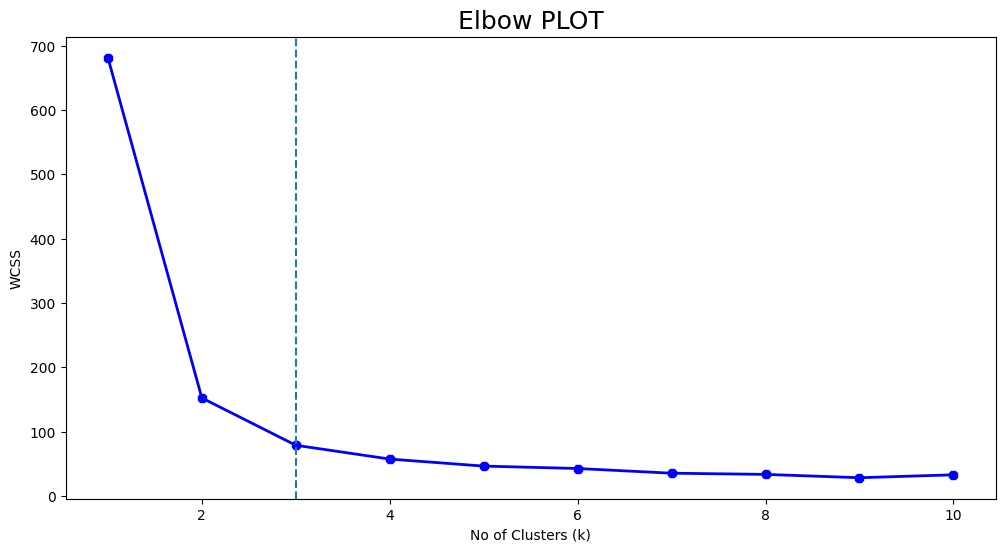

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
ax = plt.plot(range(1,11),wcss,linewidth = 2, color = 'blue',marker = '8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters (k)')
plt.title('Elbow PLOT', fontsize = 18)
plt.show()

In [39]:
cleaned_df = df.drop('class',axis=1)
cleaned_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


In [40]:
clustering_data = cleaned_df.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667


## Heirarchical Clustering

In [31]:
import scipy.cluster.hierarchy as shc

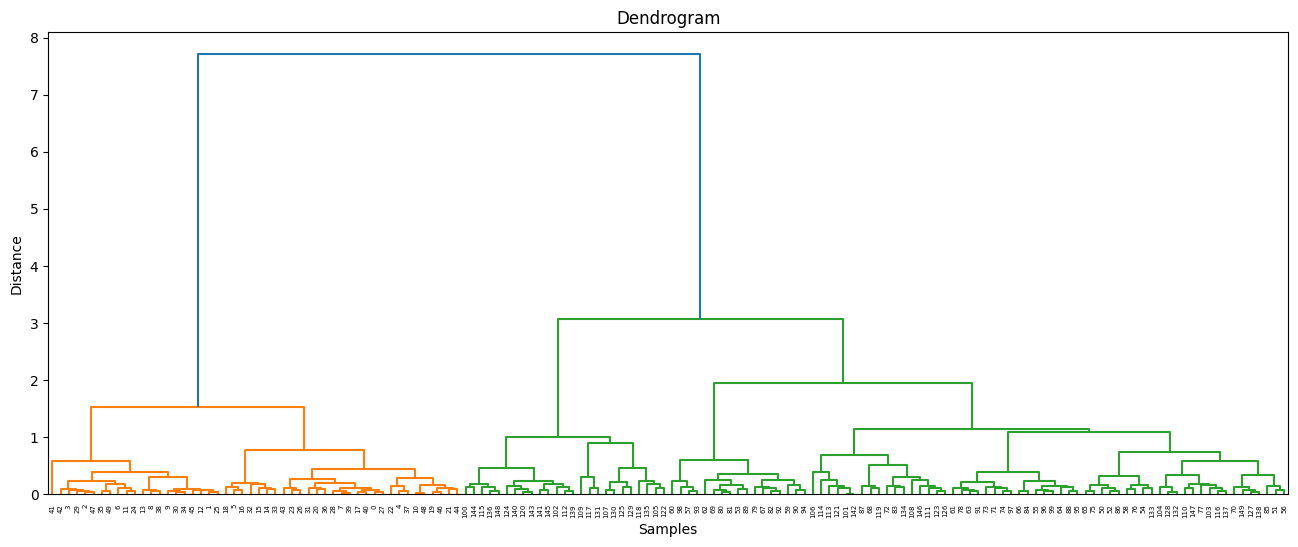

In [42]:
# Calculate linkage using Ward's method and create the dendrogram

plt.figure(figsize=(16, 6))
dendro = shc.dendrogram(shc.linkage(clustering_data, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## Agglomerative Clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(clustering_data)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
cleaned_df['cluster']=hc_pred
cleaned_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


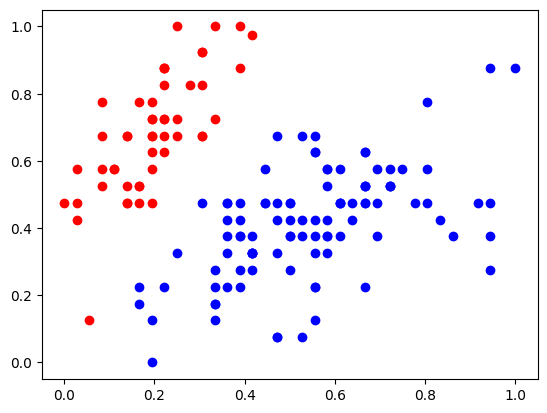

In [46]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = cleaned_df[cleaned_df['cluster'] == 0]
df2 = cleaned_df[cleaned_df['cluster'] == 1]
df3 = cleaned_df[cleaned_df['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

## Silhouette Coefficient

In [47]:
## to evaluate the quality of clustering.

In [48]:
from sklearn.metrics import silhouette_score
s=[]
k_rng = range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(clustering_data)
    s.append(silhouette_score(clustering_data,km_pred))

In [49]:
silhouette_score(clustering_data,km_pred)

0.31900746649781697

Text(0.5, 1.0, 'Silhouette Score/ Number of Clusters')

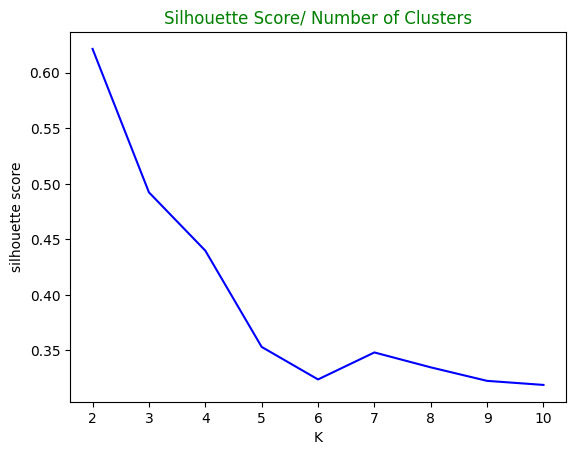

In [51]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s,color='blue')
plt.title('Silhouette Score/ Number of Clusters',color='green')

## silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.

## Silhouette Score of 0.6213 K Means clustering achieved a relatively high silhouette score, indicating well-separated and compact clusters. This suggests that K Means clustering is effective in capturing the underlying structure of the Iris dataset.

## Hierarchical Clustering  Silhouette Score of 0.3150 , produced a lower silhouette score compared to K Means. While the score is positive, indicating some level of separation and cohesion within clusters.